In [ ]:
from distill_circuit import *
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def product_n_m(n,m, alpha):
    return create_ghz_phase(alpha, n).tensor(create_ghz_phase(alpha, m))

In [ ]:
a_values = np.linspace(0, 1, 101)

In [ ]:
single_distillations = []
for n_distill in range(1, 11):
    # print(n_distill)
    d = [repeat_distill(create_ghz_phase(a, 1).tensor(tensor_n(zero_state, 4)), n_distill, full=True, verbose=False) for a in a_values]
    # print("done")
    single_distillations.append(d)


In [ ]:
ghz_distillations = []
for n_distill in range(1, 11):
    # print(n_distill)
    d = [repeat_distill(create_ghz_phase(a, 5), n_distill, full=True, verbose=False) for a in a_values]
    # print("done")
    ghz_distillations.append(d)


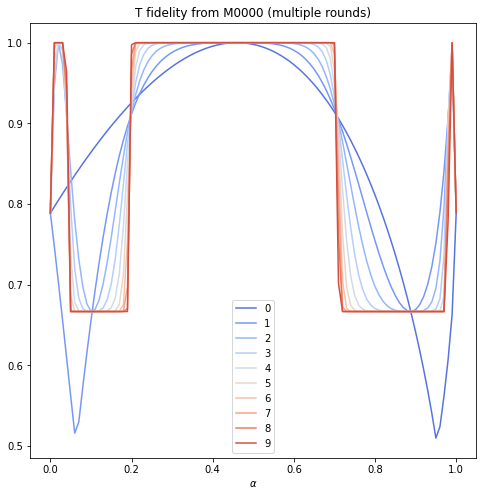

In [ ]:
plt.figure(figsize=(8, 8))
with sns.color_palette("coolwarm", 10):
    for i, d in enumerate(single_distillations):
        plt.plot(a_values, d, label=i)
plt.title("T fidelity from M0000 (multiple rounds)")
plt.xlabel(r"$\alpha$")
plt.legend(loc='best')

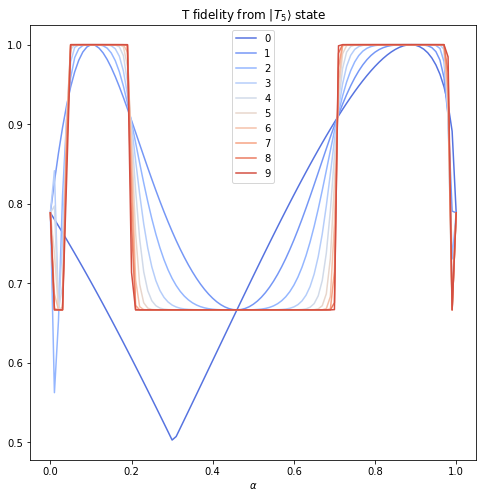

In [ ]:
plt.figure(figsize=(8, 8))
with sns.color_palette("coolwarm", 10):
    for i, d in enumerate(ghz_distillations):
        plt.plot(a_values, d, label=i)
plt.title("T fidelity from $|T_5\\rangle$ state")
plt.xlabel(r"$\alpha$")
plt.legend(loc='best')

## Filling all the slots with GHZ type magic

In [ ]:
ghz_1_4_distillations = []
for n_distill in range(1, 11):
    # print(n_distill)
    d = [repeat_distill(create_ghz_phase(a, 1).tensor(create_ghz_phase(a, 4)), n_distill, full=True, verbose=False) for a in a_values]
    # print("done")
    ghz_1_4_distillations.append(d)

ghz_2_3_distillations = []
for n_distill in range(1, 11):
    # print(n_distill)
    d = [repeat_distill(create_ghz_phase(a, 2).tensor(create_ghz_phase(a, 3)), n_distill, full=True, verbose=False) for a in a_values]
    # print("done")
    ghz_2_3_distillations.append(d)

ghz_3_2_distillations = []
for n_distill in range(1, 11):
    # print(n_distill)
    d = [repeat_distill(create_ghz_phase(a, 3).tensor(create_ghz_phase(a, 2)), n_distill, full=True, verbose=False) for a in a_values]
    # print("done")
    ghz_3_2_distillations.append(d)

ghz_4_1_distillations = []
for n_distill in range(1, 11):
    # print(n_distill)
    d = [repeat_distill(create_ghz_phase(a, 4).tensor(create_ghz_phase(a, 1)), n_distill, full=True, verbose=False) for a in a_values]
    # print("done")
    ghz_4_1_distillations.append(d)

ghz_2_2_1_distillations = []
for n_distill in range(1, 11):
    # print(n_distill)
    d = [repeat_distill(create_ghz_phase(a, 2).tensor(create_ghz_phase(a, 2).tensor(create_ghz_phase(a, 1))), n_distill, full=True, verbose=False) for a in a_values]
    # print("done")
    ghz_2_2_1_distillations.append(d)


In [ ]:
np.array(ghz_4_1_distillations)[: ,1]
a = a_values[1]
repeat_distill(create_ghz_phase(a, 2).tensor(create_ghz_phase(a, 3)), 2, full=True, verbose=False)

0.7465101691733058

Text(0.5, 0, '$\\alpha$')

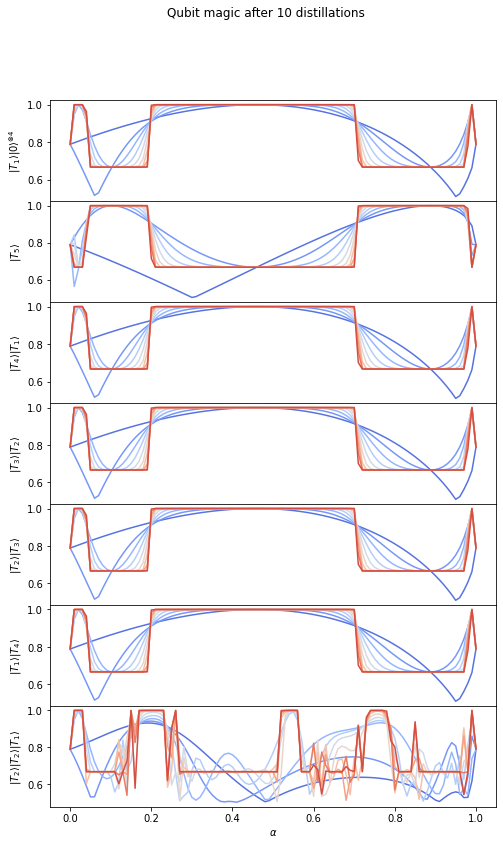

In [ ]:
all_distillations = [single_distillations, 
                    ghz_distillations, 
                    ghz_4_1_distillations, 
                    ghz_3_2_distillations, 
                    ghz_2_3_distillations, 
                    ghz_1_4_distillations,
                    ghz_2_2_1_distillations]
all_labels = ["$|T_1\\rangle|0\\rangle^{\otimes 4}$",
            "$|T_5\\rangle$",
            "$|T_4\\rangle|T_1\\rangle$",
            "$|T_3\\rangle|T_2\\rangle$",
            "$|T_2\\rangle|T_3\\rangle$",
            "$|T_1\\rangle|T_4\\rangle$",
            "$|T_2\\rangle|T_2\\rangle|T_1\\rangle$"
]
fig, axs = plt.subplots(len(all_distillations), figsize=(8, 13), sharex=True, gridspec_kw={'hspace': 0})
fig.suptitle('Qubit magic after 10 distillations')

for ax, dist, lab in zip(axs, all_distillations, all_labels):
    for d,c in zip(dist, sns.color_palette("coolwarm", 10)):
        ax.plot(a_values, d, color=c)
    ax.set_ylabel(lab)

ax.set_xlabel("$\\alpha$")

## Putting magic only in some spots

In [ ]:
# Here we are using the notation "x" to fill in with zeros
T_1_4x_distillations = []
T_x_1_3x_distillations = []
T_2x_1_2x_distillations = []
T_2_3x_distillations = []
T_x_2_2x_distillations = []
T_2x_2_x_distillations = []
T_2x_3_distillations = []
T_3_2x_distillations = []
T_x_3_x_distillations = []
T_x_4_distillations = []
T_4_x_distillations = []

for n_distill in range(1, 11):
    # print(n_distill)
    T_1_4x_distillations.append([repeat_distill(create_ghz_phase(a, 1).tensor(tensor_n(zero_state, 4)),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_x_1_3x_distillations.append([repeat_distill(zero_state.tensor(create_ghz_phase(a, 1).tensor(tensor_n(zero_state, 3))),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_2x_1_2x_distillations.append([repeat_distill(tensor_n(zero_state, 2).tensor(create_ghz_phase(a, 1).tensor(tensor_n(zero_state, 2))),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_2_3x_distillations.append([repeat_distill(create_ghz_phase(a, 2).tensor(tensor_n(zero_state, 3)),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_x_2_2x_distillations.append([repeat_distill(zero_state.tensor(create_ghz_phase(a, 2).tensor(tensor_n(zero_state, 2))),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_2x_2_x_distillations.append([repeat_distill(tensor_n(zero_state, 2).tensor(create_ghz_phase(a, 2).tensor(zero_state)),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_2x_3_distillations.append([repeat_distill(tensor_n(zero_state, 4).tensor(create_ghz_phase(a, 1)),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_3_2x_distillations.append([repeat_distill(create_ghz_phase(a, 3).tensor(tensor_n(zero_state, 2)),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_x_3_x_distillations.append([repeat_distill(zero_state.tensor(create_ghz_phase(a, 3).tensor(zero_state)),
                                 n_distill, full=True, verbose=False) for a in a_values])                             
    T_x_4_distillations.append([repeat_distill(zero_state.tensor(create_ghz_phase(a, 4)),
                                 n_distill, full=True, verbose=False) for a in a_values])
    T_4_x_distillations.append([repeat_distill(create_ghz_phase(a, 4).tensor(zero_state),
                                 n_distill, full=True, verbose=False) for a in a_values])


In [ ]:
for n_distill in range(1, 11):
    T_x_3_x_distillations.append([repeat_distill(zero_state.tensor(create_ghz_phase(a, 3).tensor(zero_state)),
                                 n_distill, full=True, verbose=False) for a in a_values])

Text(0.5, 0, '$\\alpha$')

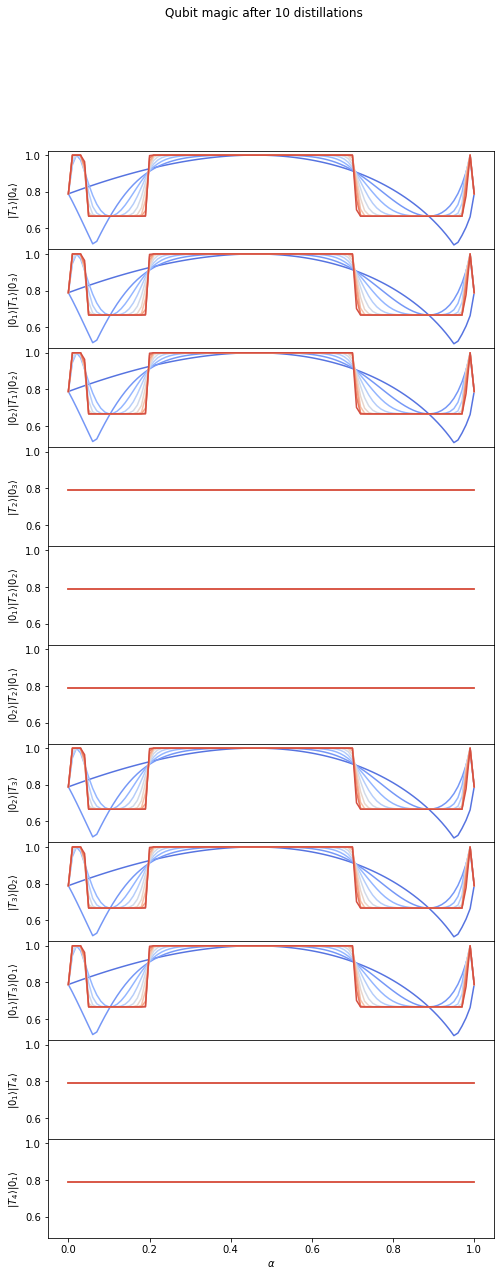

In [ ]:
all_distillations = [T_1_4x_distillations,
                    T_x_1_3x_distillations,
                    T_2x_1_2x_distillations,
                    T_2_3x_distillations,
                    T_x_2_2x_distillations,
                    T_2x_2_x_distillations,
                    T_2x_3_distillations,
                    T_3_2x_distillations,
                    T_x_3_x_distillations,
                    T_x_4_distillations,
                    T_4_x_distillations,
                    ]
all_labels = ["$|T_1\\rangle|0_4\\rangle$",
                "$|0_1\\rangle|T_1\\rangle|0_3\\rangle$",
                "$|0_2\\rangle|T_1\\rangle|0_2\\rangle$",
                "$|T_2\\rangle|0_3\\rangle$",
                "$|0_1\\rangle|T_2\\rangle|0_2\\rangle$",
                "$|0_2\\rangle|T_2\\rangle|0_1\\rangle$",
                "$|0_2\\rangle|T_3\\rangle$",
                "$|T_3\\rangle|0_2\\rangle$",
                "$|0_1\\rangle|T_3\\rangle|0_1\\rangle$",
                "$|0_1\\rangle|T_4\\rangle$",
                "$|T_4\\rangle|0_1\\rangle$"
]
fig, axs = plt.subplots(len(all_distillations), figsize=(8, 20), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Qubit magic after 10 distillations')

for ax, dist, lab in zip(axs, all_distillations, all_labels):
    for d,c in zip(dist, sns.color_palette("coolwarm", 10)):
        ax.plot(a_values, d, color=c)
    ax.set_ylabel(lab)

ax.set_xlabel("$\\alpha$")